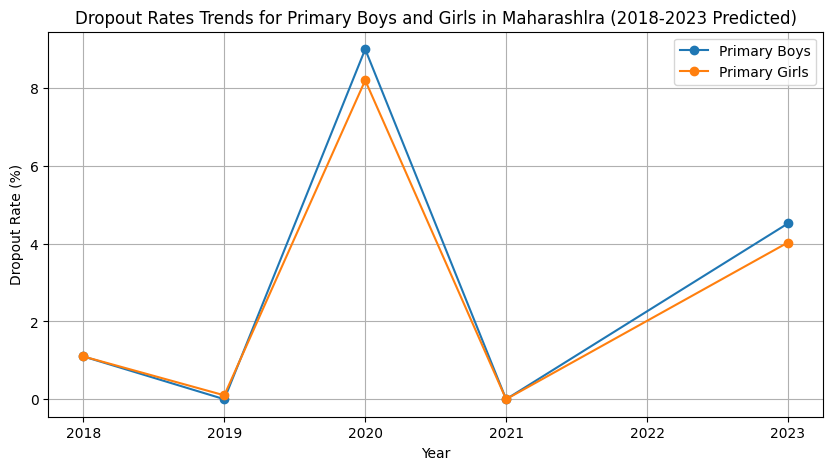

In [34]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

def predict_and_plot_dropout_by_state(dropout_data, state_name, future_year):
    # Filter data for the specified state
    state_data = dropout_data[dropout_data['State/UT'] == state_name]

    # Prepare the data for the model
    years = np.array([2018, 2019, 2020, 2021]).reshape(-1, 1)
    dropout_rates_boys = state_data[['Primary Boys_2018_19', 'Primary Boys_2019_20',
                                     'Primary Boys_2020_21', 'Primary Boys_2021_22']].values.flatten()
    dropout_rates_girls = state_data[['Primary Girls_2018_19', 'Primary Girls_2019_20',
                                      'Primary Girls_2020_21', 'Primary Girls_2021_22']].values.flatten()

    # Create and train linear regression models
    model_boys = LinearRegression()
    model_girls = LinearRegression()
    model_boys.fit(years, dropout_rates_boys)
    model_girls.fit(years, dropout_rates_girls)

    # Predict dropout rates for the future year and clip negative values
    future_year_array = np.array([future_year]).reshape(-1, 1)
    predicted_dropout_boys = np.clip(model_boys.predict(future_year_array), 0, None)
    predicted_dropout_girls = np.clip(model_girls.predict(future_year_array), 0, None)

    # Plotting the results
    plt.figure(figsize=(10, 5))
    plt.plot(np.append(years, future_year), np.append(dropout_rates_boys, predicted_dropout_boys), marker='o', label='Primary Boys')
    plt.plot(np.append(years, future_year), np.append(dropout_rates_girls, predicted_dropout_girls), marker='o', label='Primary Girls')
    plt.title(f"Dropout Rates Trends for Primary Boys and Girls in {state_name} (2018-{future_year} Predicted)")
    plt.xlabel('Year')
    plt.ylabel('Dropout Rate (%)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
# Assuming dropout_data is your loaded dataset
dropout_data = pd.read_csv('/content/Properly_Cleaned_Student_Dropout_Data.csv')

# Predict and plot dropout rates for Bihar in 2023
# predict_and_plot_dropout_by_state(dropout_data, 'India', 2023)

# Predict and plot dropout rates for another state (e.g., Maharashtra) in 2023
predict_and_plot_dropout_by_state(dropout_data, 'Maharashlra', 2023)


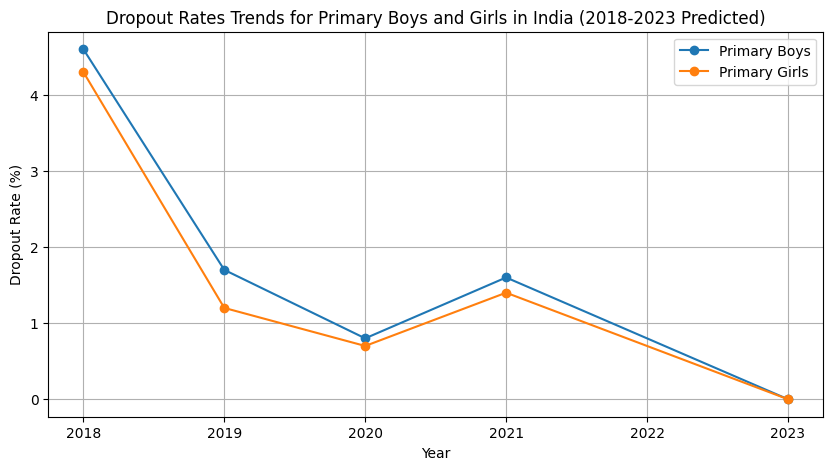

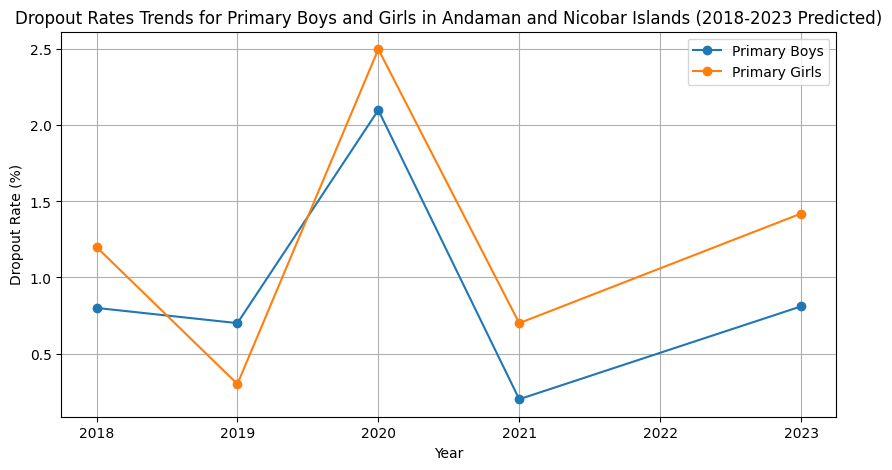

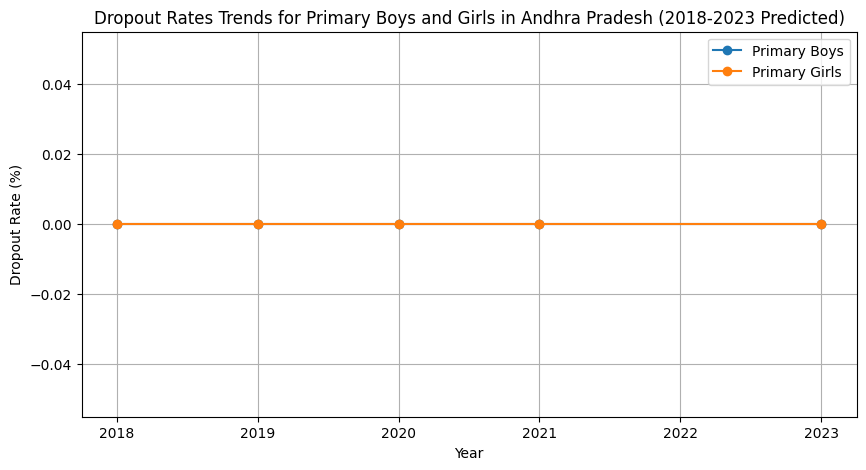

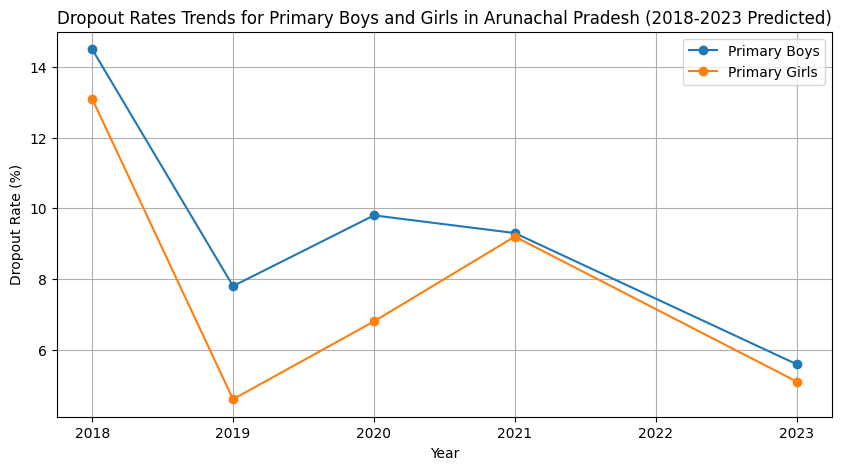

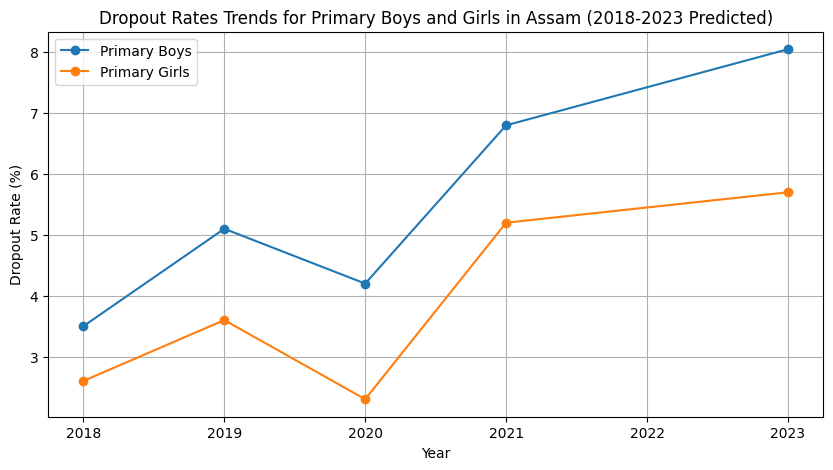

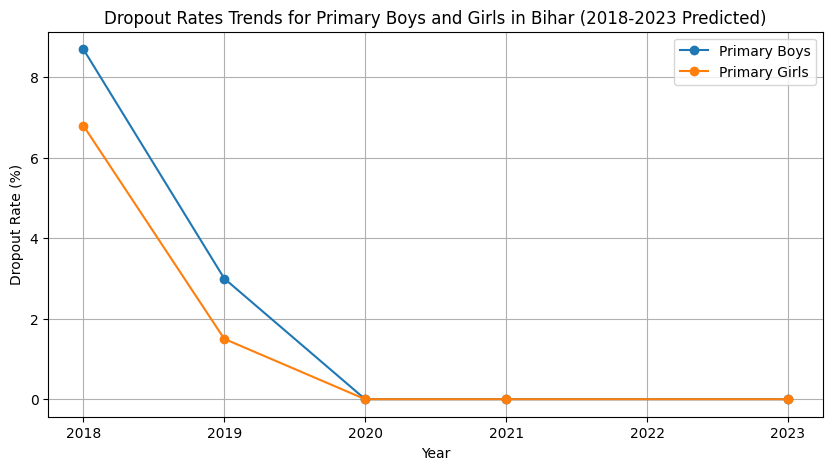

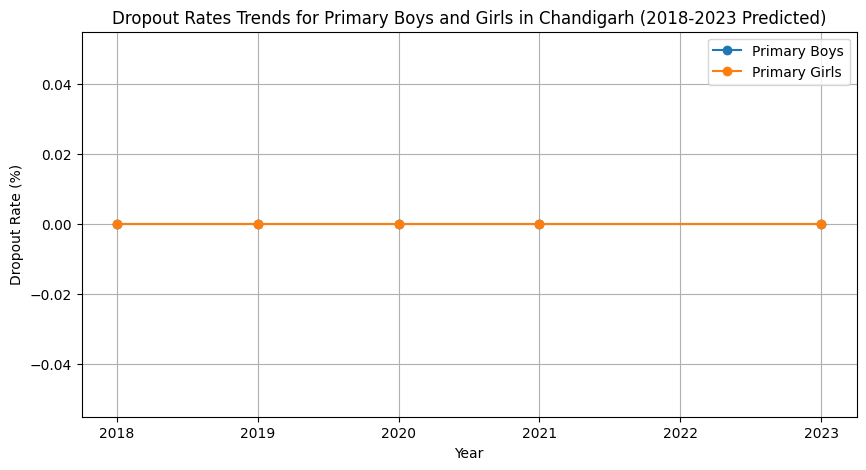

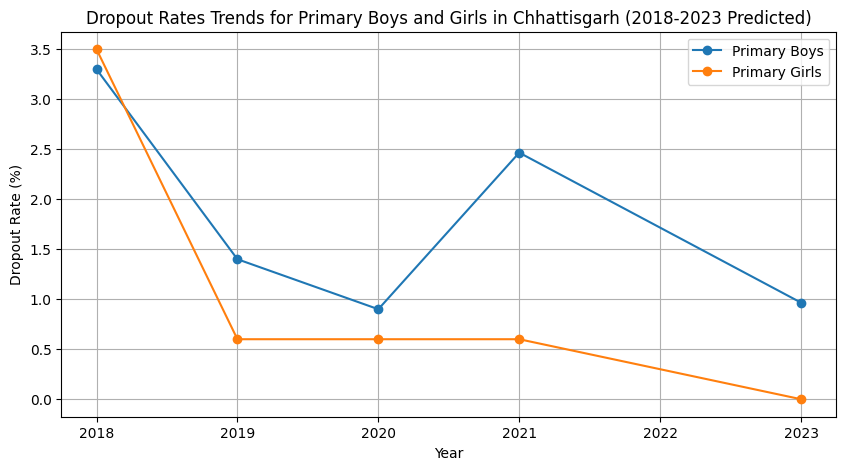

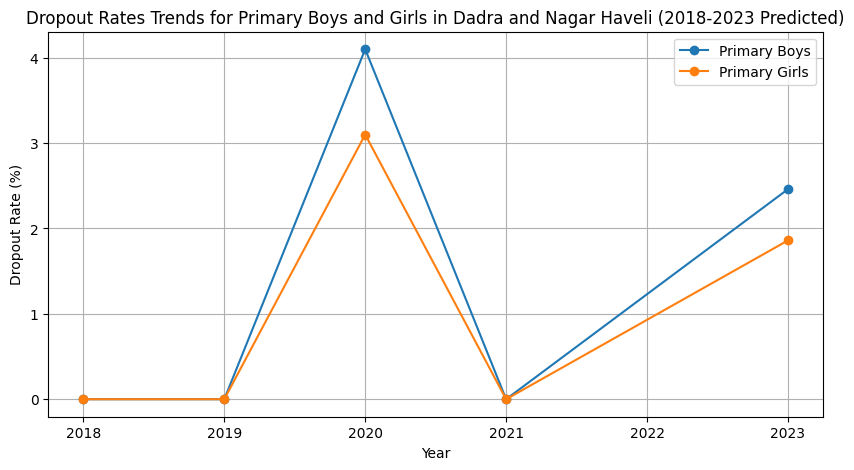

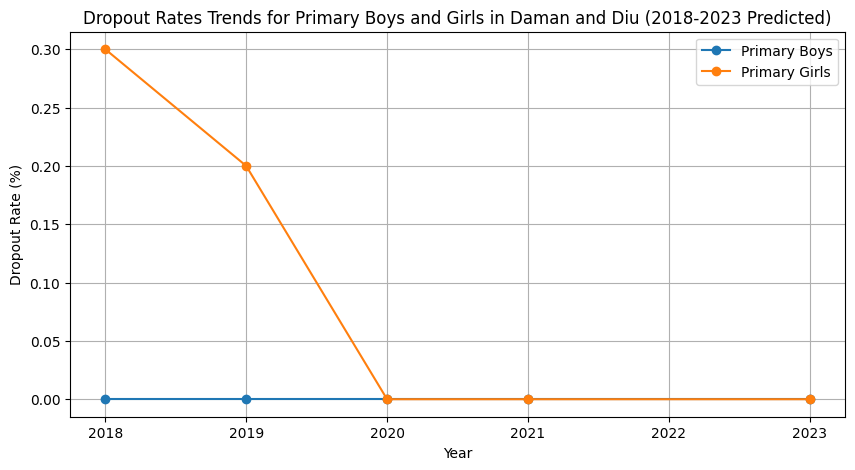

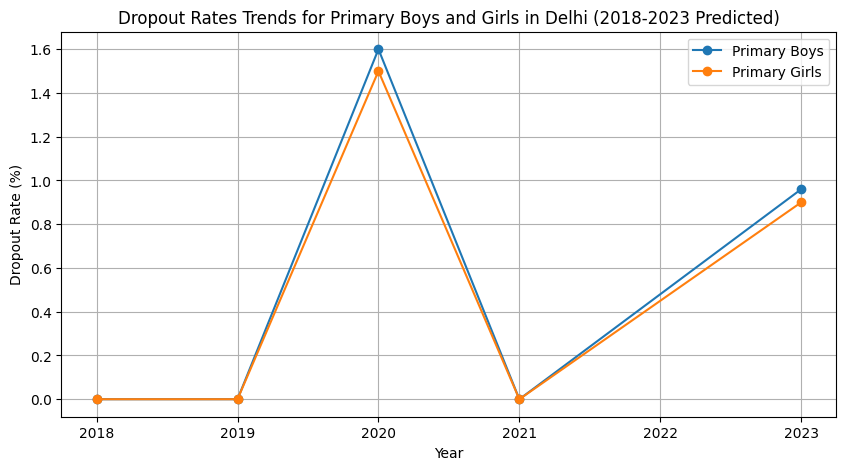

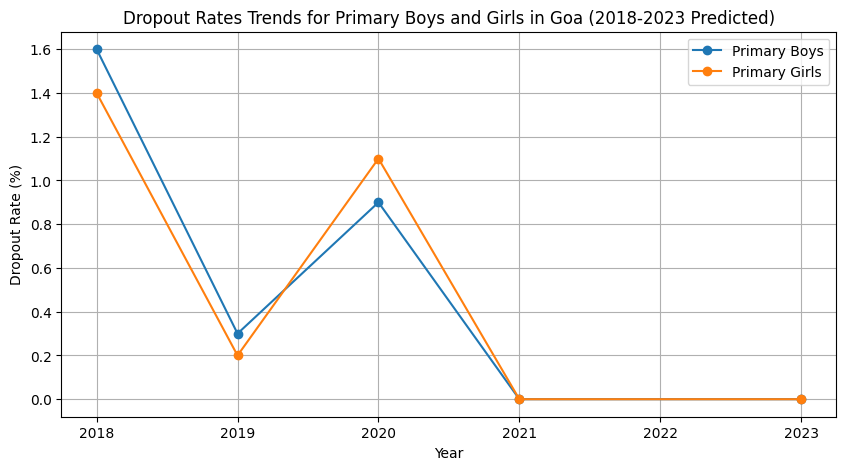

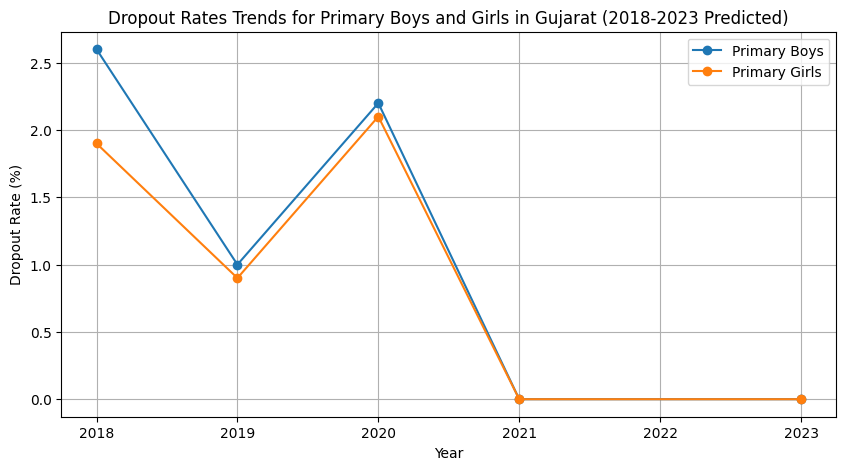

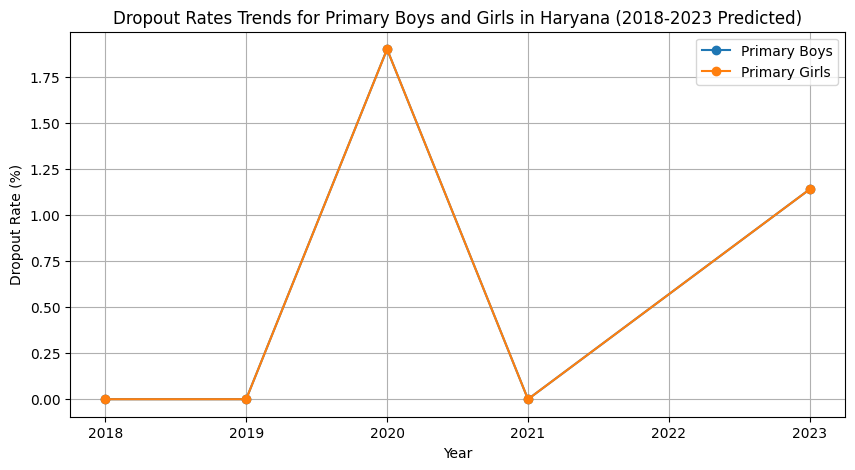

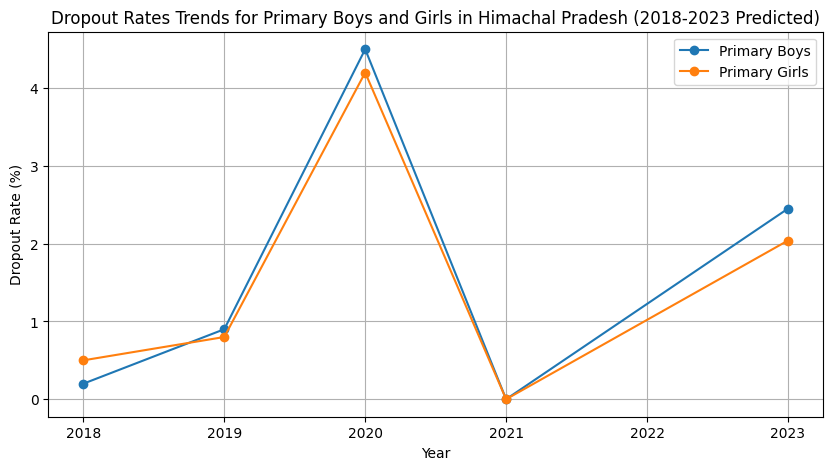

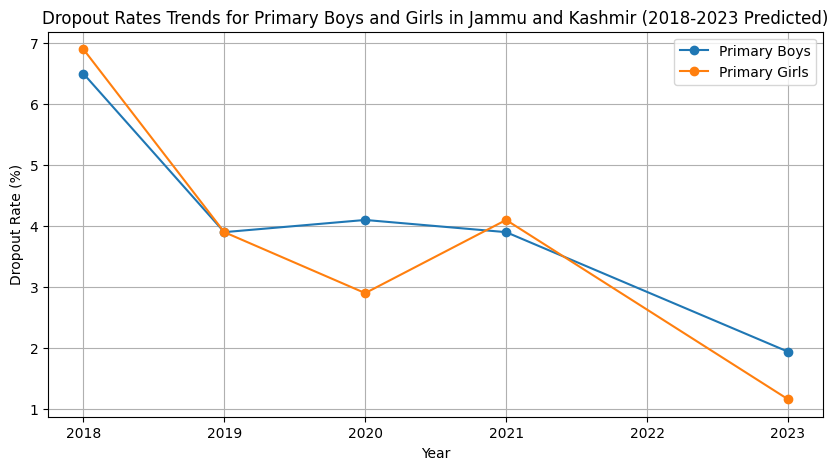

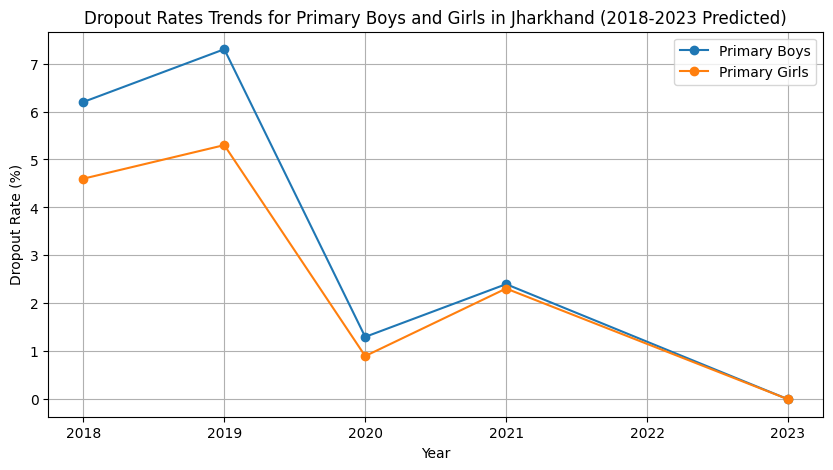

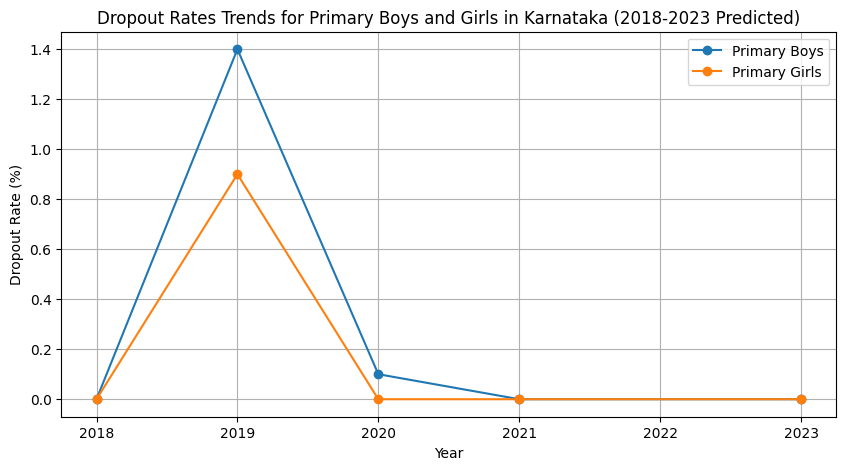

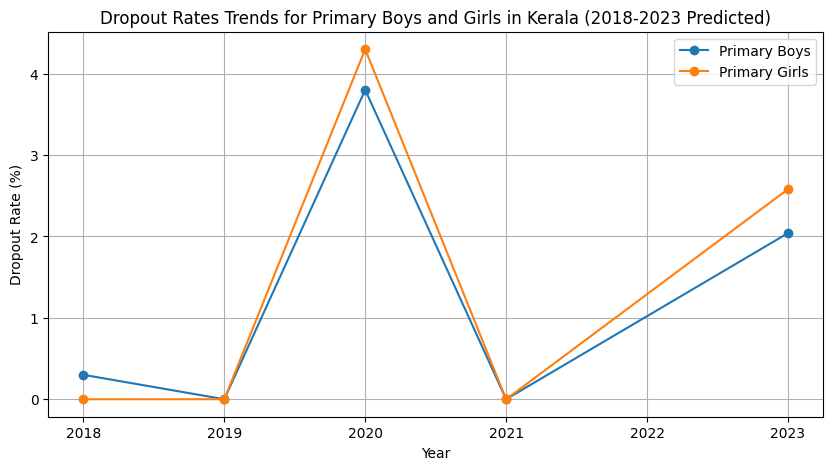

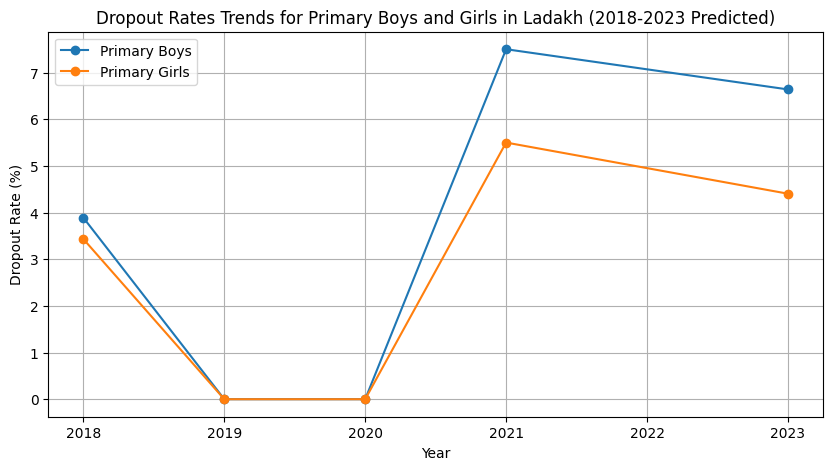

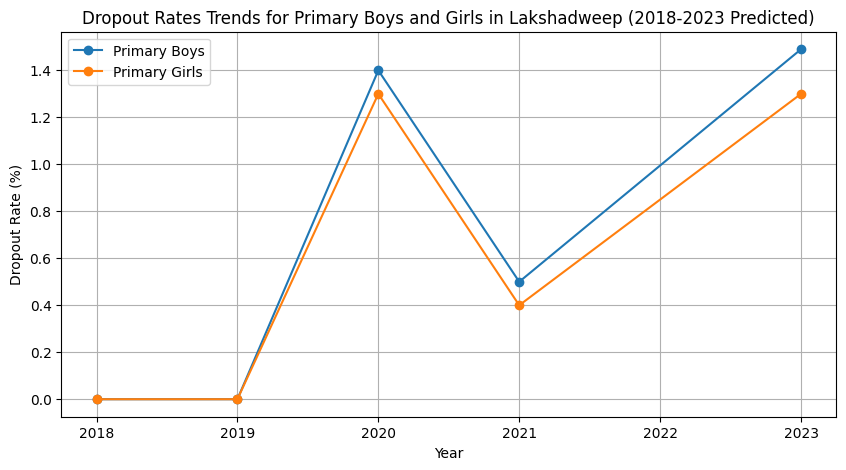

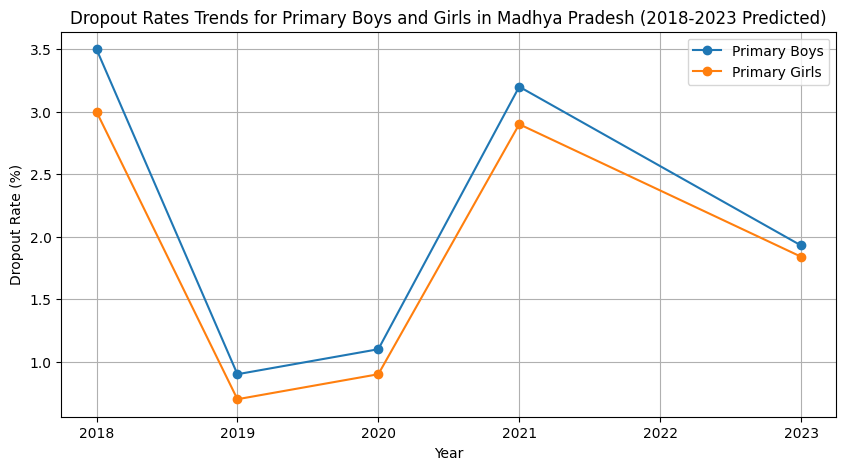

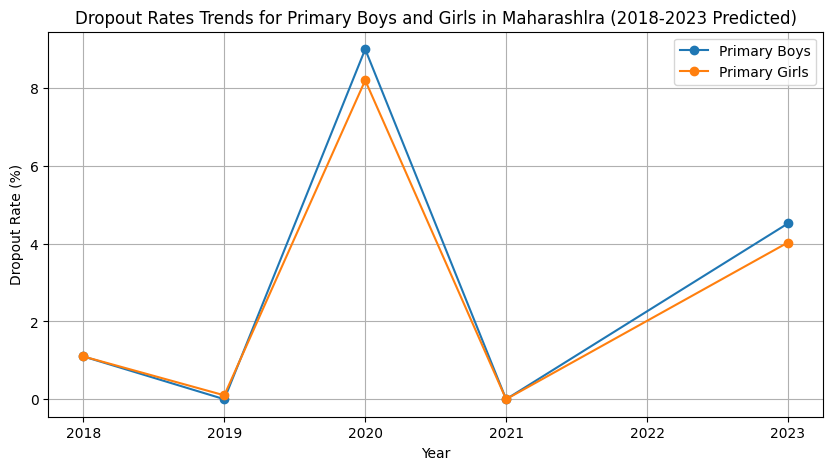

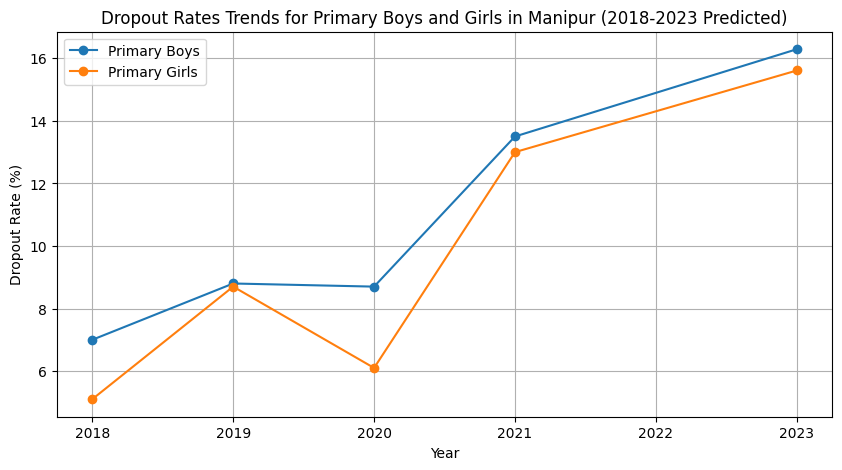

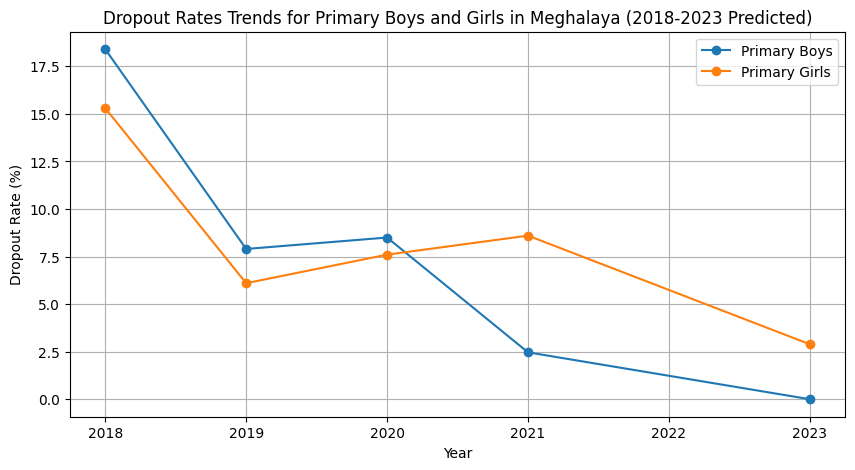

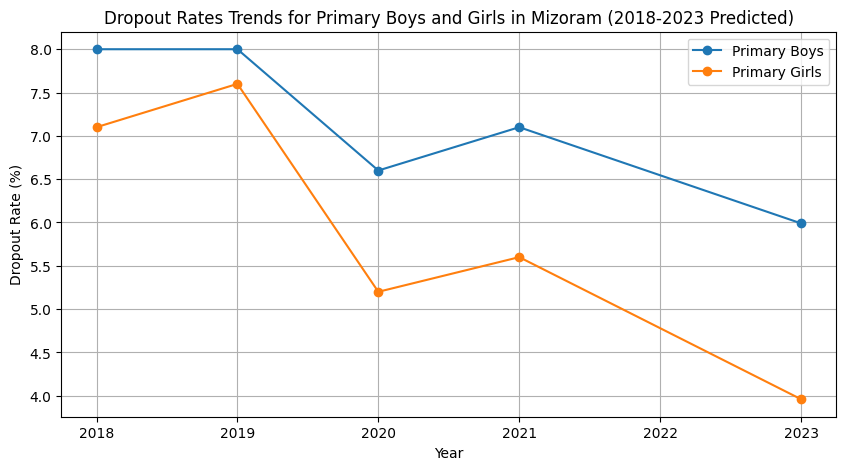

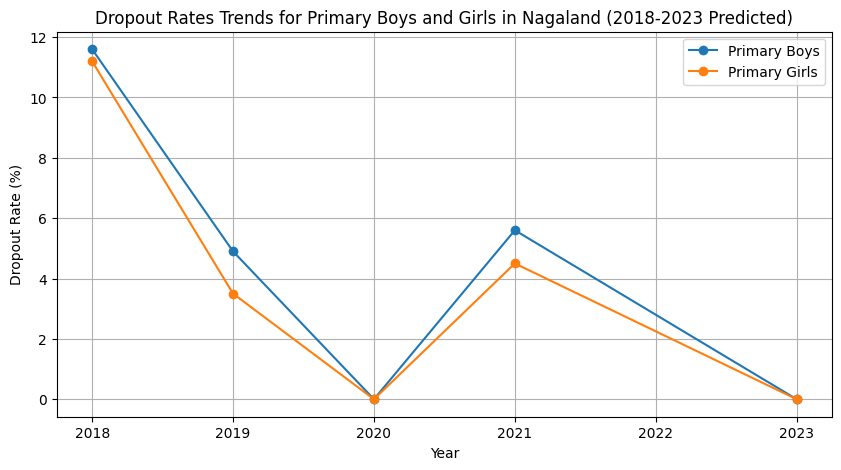

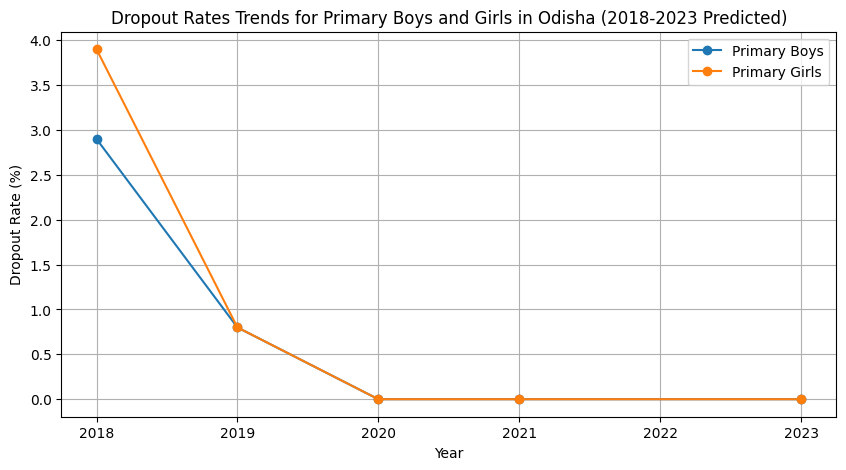

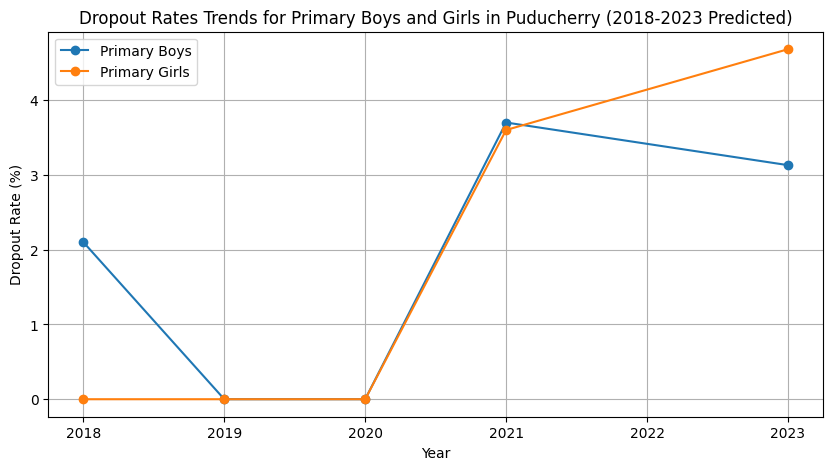

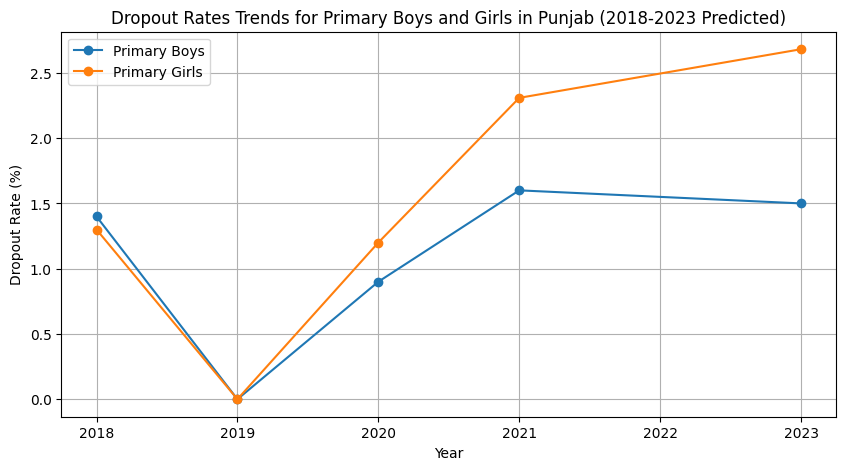

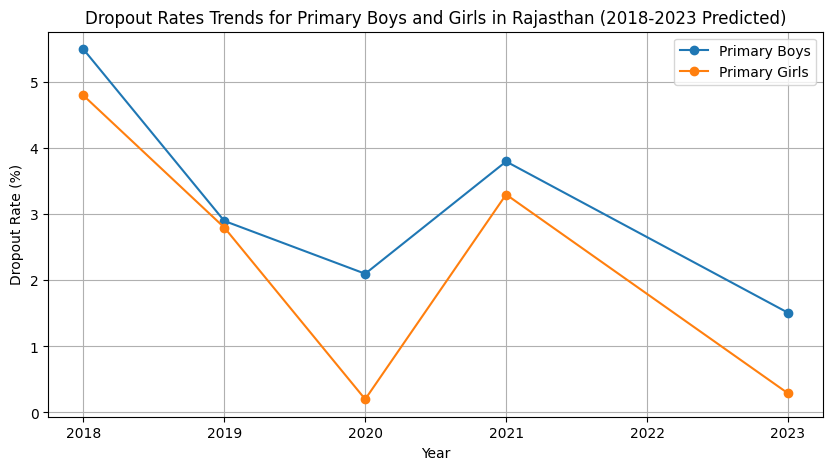

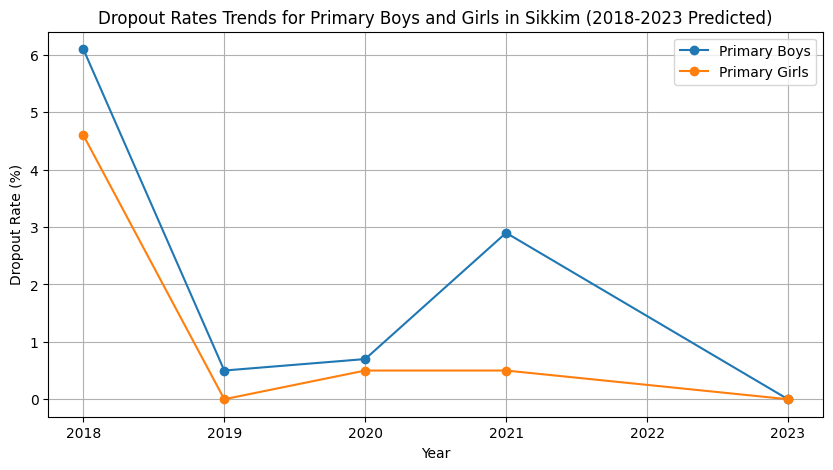

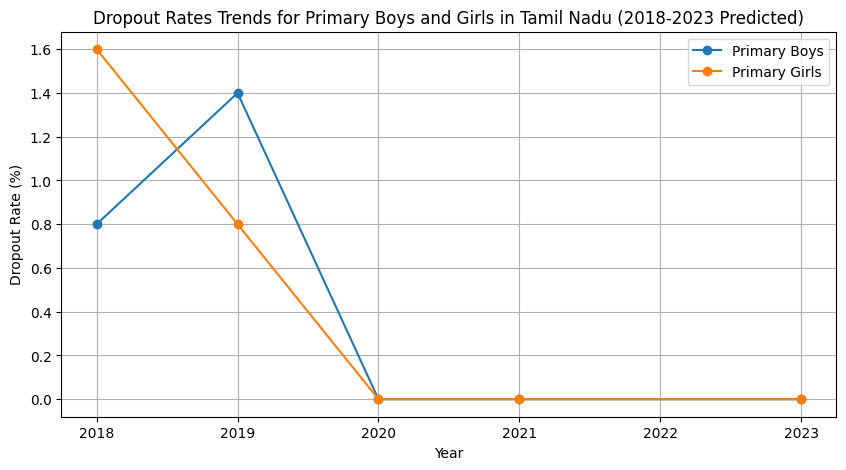

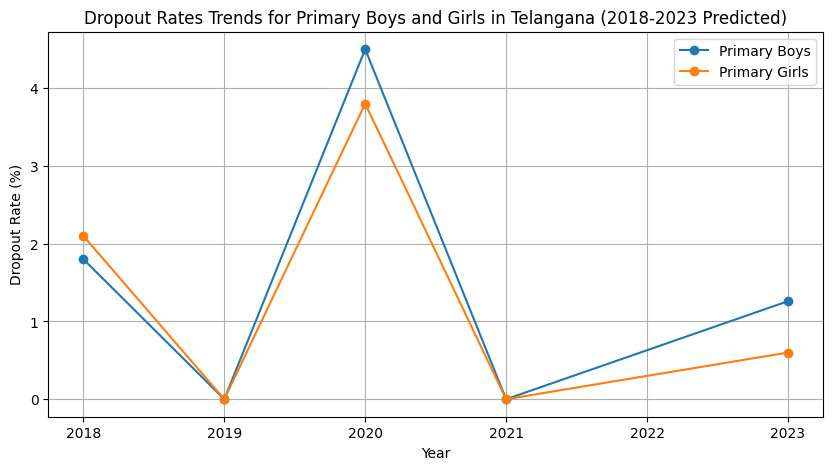

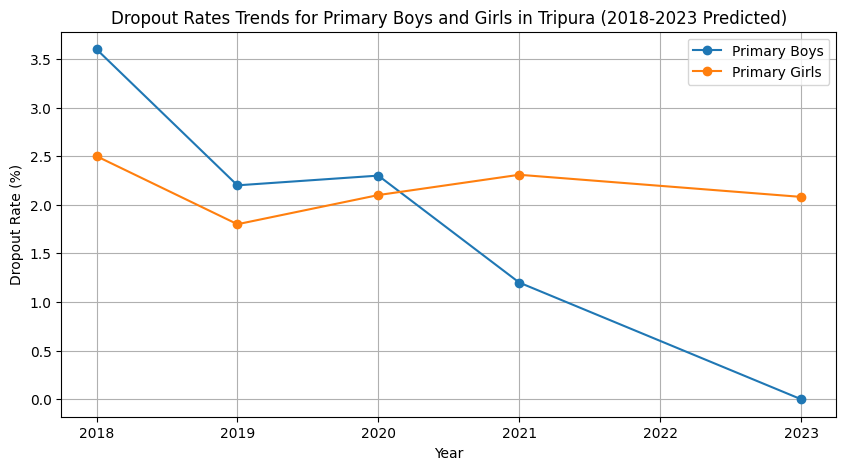

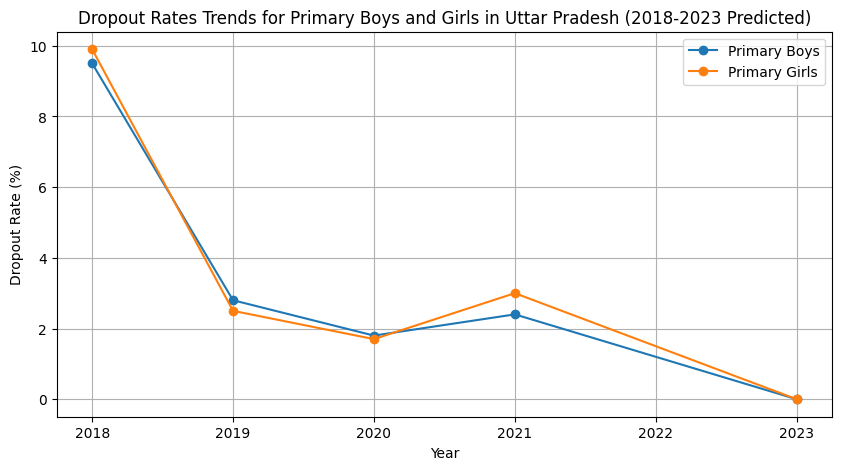

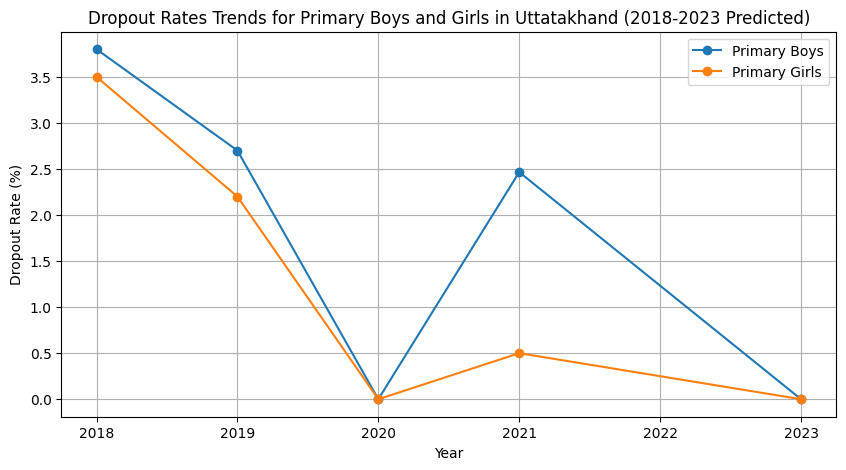

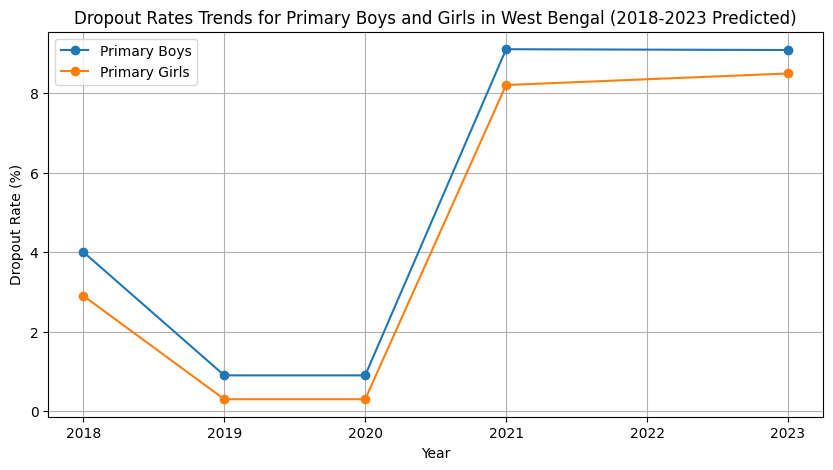

In [36]:

# List of states
states = [
    'India', 'Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
    'Chhattisgarh', 'Dadra and Nagar Haveli', 'Daman and Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
    'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh', 'Maharashlra',
    'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
    'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttatakhand', 'West Bengal'
]

# Iterate over each state and predict/plot dropout rates for 2023
for state in states:
    try:
        predict_and_plot_dropout_by_state(dropout_data, state, 2023)
    except KeyError:
        print(f"No data found for {state}. Skipping...")


In [21]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the dataset
data_path = '/content/Properly_Cleaned_Student_Dropout_Data.csv'
dropout_data = pd.read_csv(data_path)

# Prepare the data
years = np.array([2018, 2019, 2020, 2021]).reshape(-1, 1)

# Initialize an empty list to collect DataFrame rows
predicted_dropout_rows = []

# Loop through each State/UT
for state in dropout_data['State/UT'].unique():
    state_data = dropout_data[dropout_data['State/UT'] == state]

    # Primary level
    primary_boys_rates = state_data[['Primary Boys_2018_19', 'Primary Boys_2019_20', 'Primary Boys_2020_21', 'Primary Boys_2021_22']].values.flatten()
    primary_girls_rates = state_data[['Primary Girls_2018_19', 'Primary Girls_2019_20', 'Primary Girls_2020_21', 'Primary Girls_2021_22']].values.flatten()

    # Upper primary level
    upper_primary_boys_rates = state_data[['Upper Primary Boys_2018_19', 'Upper Primary Boys_2019_20', 'Upper Primary Boys_2020_21', 'Upper Primary Boys_2021_22']].values.flatten()
    upper_primary_girls_rates = state_data[['Upper Primary Girls_2018_19', 'Upper Primary Girls_2019_20', 'Upper Primary Girls_2020_21', 'Upper Primary Girls_2021_22']].values.flatten()

    # Secondary level
    secondary_boys_rates = state_data[['Secondary Boys_2018_19', 'Secondary Boys_2019_20', 'Secondary Boys_2020_21', 'Secondary Boys_2021_22']].values.flatten()
    secondary_girls_rates = state_data[['Secondary Girls_2018_19', 'Secondary Girls_2019_20', 'Secondary Girls_2020_21', 'Secondary Girls_2021_22']].values.flatten()

    # Create and train linear regression models
    models = {
        "Primary Boys": LinearRegression(),
        "Primary Girls": LinearRegression(),
        "Upper Primary Boys": LinearRegression(),
        "Upper Primary Girls": LinearRegression(),
        "Secondary Boys": LinearRegression(),
        "Secondary Girls": LinearRegression()
    }

    for key, model in models.items():
        if "Boys" in key:
            model.fit(years, locals()[key.lower().replace(" ", "_") + "_rates"])
        else:
            model.fit(years, locals()[key.lower().replace(" ", "_") + "_rates"])

    # Predicting dropout rates for 2022 and clip negative values
    predicted_dropout_row = {
        'State/UT': state,
    }

    for key, model in models.items():
        predicted_rate = np.clip(model.predict([[2022]]), 0, None)
        predicted_dropout_row[key + " Dropout 2022-23"] = predicted_rate[0]

    # Append row to list
    predicted_dropout_rows.append(predicted_dropout_row)

# Convert the list of dictionaries to a DataFrame
predicted_dropout = pd.DataFrame(predicted_dropout_rows)

# Save the results to a new CSV file
predicted_dropout.to_csv('predicted_dropout_rates_2022_23.csv', index=False)


In [9]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# Load the data
data_path = '/content/Properly_Cleaned_Student_Dropout_Data.csv'
dropout_data = pd.read_csv(data_path)

# Filter for Bihar and relevant columns
bihar_data = dropout_data[dropout_data['State/UT'] == 'Bihar']

# Prepare the data for the model
years = np.array([2018, 2019, 2020, 2021]).reshape(-1, 1)
dropout_rates_boys = bihar_data[['Primary Boys_2018_19', 'Primary Boys_2019_20', 'Primary Boys_2020_21', 'Primary Boys_2021_22']].values.flatten()
dropout_rates_girls = bihar_data[['Primary Girls_2018_19', 'Primary Girls_2019_20', 'Primary Girls_2020_21', 'Primary Girls_2021_22']].values.flatten()

# Create and train linear regression models
model_boys = LinearRegression()
model_girls = LinearRegression()
model_boys.fit(years, dropout_rates_boys)
model_girls.fit(years, dropout_rates_girls)

# Predicting dropout rates for 2022 and clip negative values
predicted_dropout_boys_2023 = np.clip(model_boys.predict([[2022]]), 0, None)
predicted_dropout_girls_2023 = np.clip(model_girls.predict([[2022]]), 0, None)

print("Adjusted 2022-23 Dropout Rate for Primary Boys:", predicted_dropout_boys_2023[0])
print("Adjusted 2022-23 Dropout Rate for Primary Girls:", predicted_dropout_girls_2023[0])


Adjusted 2022-23 Dropout Rate for Primary Boys: 0.0
Adjusted 2022-23 Dropout Rate for Primary Girls: 0.0


In [12]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# Load the data
data_path = '/content/Properly_Cleaned_Student_Dropout_Data.csv'
dropout_data = pd.read_csv(data_path)

# Filter for Bihar and relevant columns
bihar_data = dropout_data[dropout_data['State/UT'] == 'Ladakh']

# Prepare the data for the model
years = np.array([2018, 2019, 2020, 2021]).reshape(-1, 1)
dropout_rates_boys = bihar_data[['Primary Boys_2018_19', 'Primary Boys_2019_20', 'Primary Boys_2020_21', 'Primary Boys_2021_22']].values.flatten()
dropout_rates_girls = bihar_data[['Primary Girls_2018_19', 'Primary Girls_2019_20', 'Primary Girls_2020_21', 'Primary Girls_2021_22']].values.flatten()

# Create and train linear regression models
model_boys = LinearRegression()
model_girls = LinearRegression()
model_boys.fit(years, dropout_rates_boys)
model_girls.fit(years, dropout_rates_girls)

# Predicting dropout rates for 2022 and clip negative values
predicted_dropout_boys_2023 = np.clip(model_boys.predict([[2022]]), 0, None)
predicted_dropout_girls_2023 = np.clip(model_girls.predict([[2022]]), 0, None)

print("Adjusted 2022-23 Dropout Rate for Primary Boys:", predicted_dropout_boys_2023[0])
print("Adjusted 2022-23 Dropout Rate for Primary Girls:", predicted_dropout_girls_2023[0])


Adjusted 2022-23 Dropout Rate for Primary Boys: 5.555405405500096
Adjusted 2022-23 Dropout Rate for Primary Girls: 3.783783783999752


In [13]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Assume you have already loaded the dataset
# dropout_data = pd.read_csv('/path_to_your_file/Properly_Cleaned_Student_Dropout_Data.csv')
ladakh_data = dropout_data[dropout_data['State/UT'] == 'Ladakh']

# Prepare the data
years_ladakh = np.array([2018, 2019, 2020, 2021]).reshape(-1, 1)
dropout_rates_boys_ladakh = ladakh_data[['Primary Boys_2018_19', 'Primary Boys_2019_20', 'Primary Boys_2020_21', 'Primary Boys_2021_22']].values.flatten()
dropout_rates_girls_ladakh = ladakh_data[['Primary Girls_2018_19', 'Primary Girls_2019_20', 'Primary Girls_2020_21', 'Primary Girls_2021_22']].values.flatten()

# Create Random Forest models
rf_model_boys_ladakh = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_girls_ladakh = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the models
rf_model_boys_ladakh.fit(years_ladakh, dropout_rates_boys_ladakh)
rf_model_girls_ladakh.fit(years_ladakh, dropout_rates_girls_ladakh)

# Predict for the next year, 2022
predicted_dropout_boys_2022 = rf_model_boys_ladakh.predict(np.array([[2022]]))
predicted_dropout_girls_2022 = rf_model_girls_ladakh.predict(np.array([[2022]]))

print("Predicted 2022 Dropout Rate for Primary Boys in Ladakh:", predicted_dropout_boys_2022[0])
print("Predicted 2022 Dropout Rate for Primary Girls in Ladakh:", predicted_dropout_girls_2022[0])


Predicted 2022 Dropout Rate for Primary Boys in Ladakh: 5.325
Predicted 2022 Dropout Rate for Primary Girls in Ladakh: 3.905


In [24]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
dropout_data = pd.read_csv('/content/Properly_Cleaned_Student_Dropout_Data.csv')

def predict_dropout_rates_by_state(dropout_data, state_name, year_to_predict):
    # Filter data for the specified state
    state_data = dropout_data[dropout_data['State/UT'] == state_name]

    # Prepare the data
    years = np.array([2018, 2019, 2020, 2021]).reshape(-1, 1)
    dropout_rates_boys = state_data[['Primary Boys_2018_19', 'Primary Boys_2019_20',
                                     'Primary Boys_2020_21', 'Primary Boys_2021_22']].values.flatten()
    dropout_rates_girls = state_data[['Primary Girls_2018_19', 'Primary Girls_2019_20',
                                      'Primary Girls_2020_21', 'Primary Girls_2021_22']].values.flatten()

    # Create Random Forest models
    rf_model_boys = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model_girls = RandomForestRegressor(n_estimators=100, random_state=42)

    # Train the models
    rf_model_boys.fit(years, dropout_rates_boys)
    rf_model_girls.fit(years, dropout_rates_girls)

    # Predict for the specified year
    predicted_dropout_boys = rf_model_boys.predict(np.array([[year_to_predict]]))
    predicted_dropout_girls = rf_model_girls.predict(np.array([[year_to_predict]]))

    # Output the predictions
    print(f"Predicted {year_to_predict} Dropout Rate for Primary Boys in {state_name}: {predicted_dropout_boys[0]}")
    print(f"Predicted {year_to_predict} Dropout Rate for Primary Girls in {state_name}: {predicted_dropout_girls[0]}")

# Example usage:
# Assuming dropout_data is your loaded dataset

# Predict dropout rates for Ladakh in 2022
predict_dropout_rates_by_state(dropout_data, 'Ladakh', 2022)

# Predict dropout rates for another state (e.g., Karnataka) in 2022
# predict_dropout_rates_by_state(dropout_data, 'Karnataka', 2022)


Predicted 2022 Dropout Rate for Primary Boys in Ladakh: 5.325
Predicted 2022 Dropout Rate for Primary Girls in Ladakh: 3.905


In [25]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
dropout_data = pd.read_csv('/content/Properly_Cleaned_Student_Dropout_Data.csv')

def predict_dropout_rates_by_state(dropout_data, state_name, year_to_predict):
    # Filter data for the specified state
    state_data = dropout_data[dropout_data['State/UT'] == state_name]

    # Prepare the data
    years = np.array([2018, 2019, 2020, 2021]).reshape(-1, 1)
    dropout_rates_boys = state_data[['Primary Boys_2018_19', 'Primary Boys_2019_20',
                                     'Primary Boys_2020_21', 'Primary Boys_2021_22']].values.flatten()
    dropout_rates_girls = state_data[['Primary Girls_2018_19', 'Primary Girls_2019_20',
                                      'Primary Girls_2020_21', 'Primary Girls_2021_22']].values.flatten()

    # Create Random Forest models
    rf_model_boys = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model_girls = RandomForestRegressor(n_estimators=100, random_state=42)

    # Train the models
    rf_model_boys.fit(years, dropout_rates_boys)
    rf_model_girls.fit(years, dropout_rates_girls)

    # Predict for the specified year
    predicted_dropout_boys = rf_model_boys.predict(np.array([[year_to_predict]]))
    predicted_dropout_girls = rf_model_girls.predict(np.array([[year_to_predict]]))

    # Output the predictions
    print(f"Predicted {year_to_predict} Dropout Rate for Primary Boys in {state_name}: {predicted_dropout_boys[0]}")
    print(f"Predicted {year_to_predict} Dropout Rate for Primary Girls in {state_name}: {predicted_dropout_girls[0]}")

# Example usage:
# Assuming dropout_data is your loaded dataset

# Predict dropout rates for Ladakh in 2022
predict_dropout_rates_by_state(dropout_data, 'Bihar', 2022)

# Predict dropout rates for another state (e.g., Karnataka) in 2022
# predict_dropout_rates_by_state(dropout_data, 'Karnataka', 2022)


Predicted 2022 Dropout Rate for Primary Boys in Bihar: 0.21
Predicted 2022 Dropout Rate for Primary Girls in Bihar: 0.105


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Training data: First three years
# Testing data: Last year
X_train = np.array([2018, 2019, 2020]).reshape(-1, 1)
X_test = np.array([2021]).reshape(-1, 1)
y_train = ladakh_data[['Primary Boys_2018_19', 'Primary Boys_2019_20', 'Primary Boys_2020_21']].values.flatten()
y_test = ladakh_data[['Primary Boys_2021_22']].values.flatten()

# Initialize and fit the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make a prediction for the last year
predictions = model.predict(X_test)

# Calculate and print the MSE for the prediction
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error for Manual Split:", mse)


Mean Squared Error for Manual Split: 53.37092258961959


In [15]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the dataset
data_path = '/content/Properly_Cleaned_Student_Dropout_Data.csv'
dropout_data = pd.read_csv(data_path)

# Prepare the data
years = np.array([2018, 2019, 2020, 2021]).reshape(-1, 1)

# Initialize an empty list to collect DataFrame rows
predicted_dropout_rows = []

# Loop through each State/UT
for state in dropout_data['State/UT'].unique():
    state_data = dropout_data[dropout_data['State/UT'] == state]

    dropout_rates_boys = state_data[['Primary Boys_2018_19', 'Primary Boys_2019_20', 'Primary Boys_2020_21', 'Primary Boys_2021_22']].values.flatten()
    dropout_rates_girls = state_data[['Primary Girls_2018_19', 'Primary Girls_2019_20', 'Primary Girls_2020_21', 'Primary Girls_2021_22']].values.flatten()

    # Create and train linear regression models
    model_boys = LinearRegression()
    model_girls = LinearRegression()
    model_boys.fit(years, dropout_rates_boys)
    model_girls.fit(years, dropout_rates_girls)

    # Predicting dropout rates for 2022 and clip negative values
    predicted_dropout_boys = np.clip(model_boys.predict([[2022]]), 0, None)
    predicted_dropout_girls = np.clip(model_girls.predict([[2022]]), 0, None)

    # Collect each state's predictions in a list
    predicted_dropout_rows.append({
        'State/UT': state,
        'Predicted Boys Dropout 2022-23': predicted_dropout_boys[0],
        'Predicted Girls Dropout 2022-23': predicted_dropout_girls[0]
    })

# Convert the list of dictionaries to a DataFrame
predicted_dropout = pd.DataFrame(predicted_dropout_rows)

# Save the results to a new CSV file
predicted_dropout.to_csv('predicted_dropout_rates_2022_23.csv', index=False)

print(predicted_dropout)


                       State/UT  Predicted Boys Dropout 2022-23  \
0                         India                        0.000000   
1   Andaman and Nicobar Islands                        0.850000   
2                Andhra Pradesh                        0.000000   
3             Arunachal Pradesh                        6.950000   
4                         Assam                        7.150000   
5                         Bihar                        0.000000   
6                    Chandigarh                        0.000000   
7                  Chhattisgarh                        1.265714   
8        Dadra and Nagar Haveli                        2.050000   
9                 Daman and Diu                        0.000000   
10                        Delhi                        0.800000   
11                          Goa                        0.000000   
12                      Gujarat                        0.000000   
13                      Haryana                        0.95000

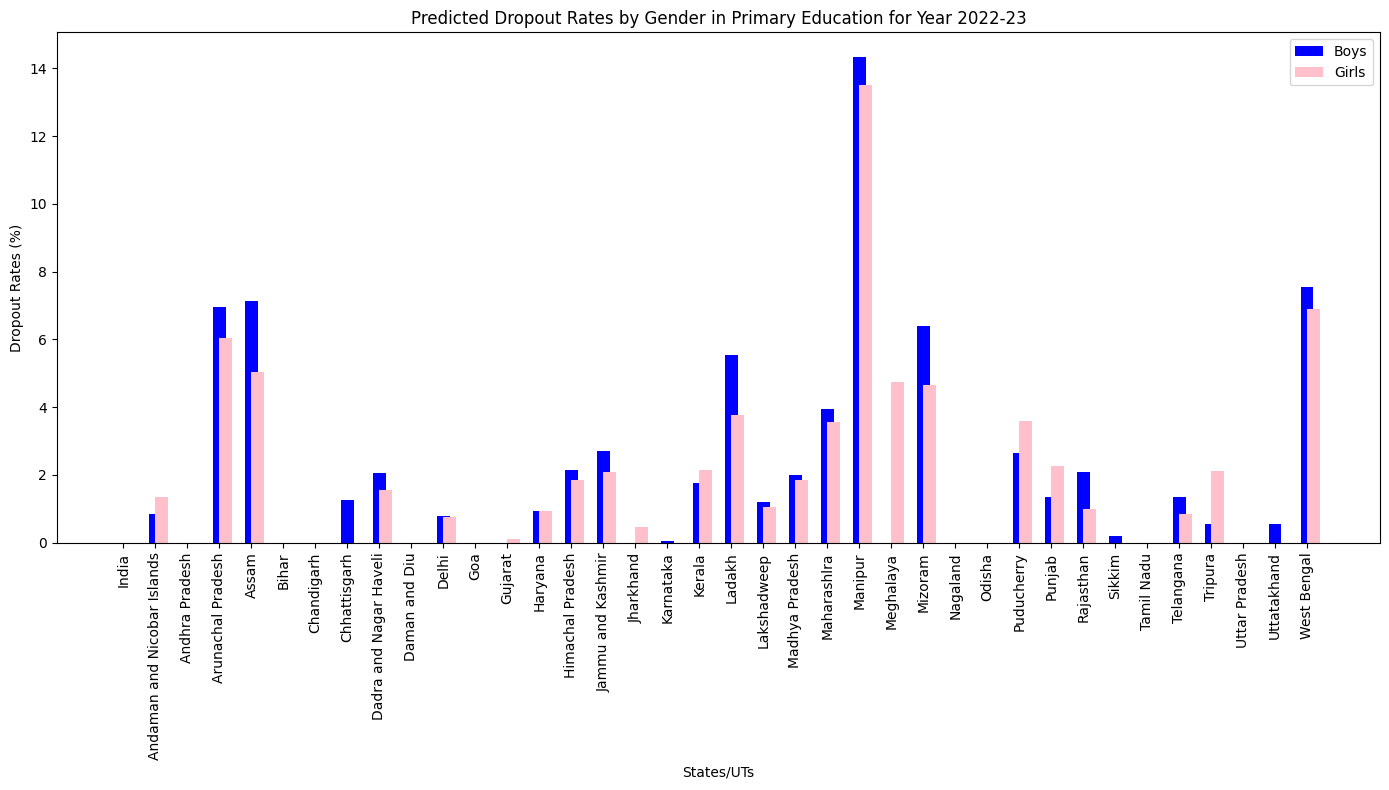

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
data_path = '/content/predicted_dropout_rates_2022_23.csv'
data = pd.read_csv(data_path)

# Clean the data if necessary (e.g., handle missing values)
data = data.dropna(subset=['Primary Boys Dropout 2022-23', 'Primary Girls Dropout 2022-23'])

# Plotting
plt.figure(figsize=(14, 8))
x = range(len(data))
plt.bar(x, data['Primary Boys Dropout 2022-23'], width=0.4, label='Boys', color='blue', align='center')
plt.bar(x, data['Primary Girls Dropout 2022-23'], width=0.4, label='Girls', color='pink', align='edge')

plt.xlabel('States/UTs')
plt.ylabel('Dropout Rates (%)')
plt.title('Predicted Dropout Rates by Gender in Primary Education for Year 2022-23')
plt.xticks(x, data['State/UT'], rotation=90)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


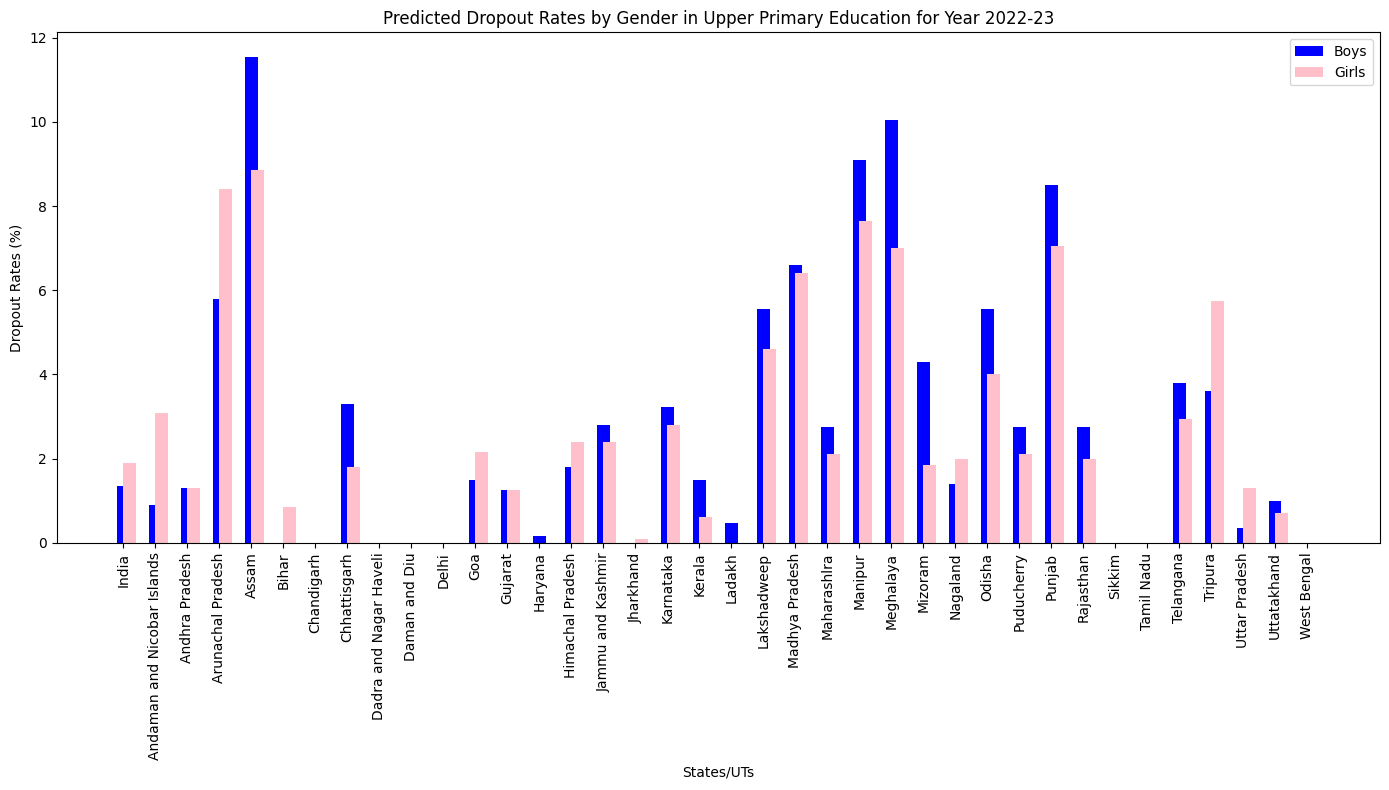

In [18]:
# Clean the data if necessary (e.g., handle missing values)
data = data.dropna(subset=['Upper Primary Boys Dropout 2022-23', 'Upper Primary Girls Dropout 2022-23'])

# Plotting
plt.figure(figsize=(14, 8))
x = range(len(data))
plt.bar(x, data['Upper Primary Boys Dropout 2022-23'], width=0.4, label='Boys', color='blue', align='center')
plt.bar(x, data['Upper Primary Girls Dropout 2022-23'], width=0.4, label='Girls', color='pink', align='edge')

plt.xlabel('States/UTs')
plt.ylabel('Dropout Rates (%)')
plt.title('Predicted Dropout Rates by Gender in Upper Primary Education for Year 2022-23')
plt.xticks(x, data['State/UT'], rotation=90)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

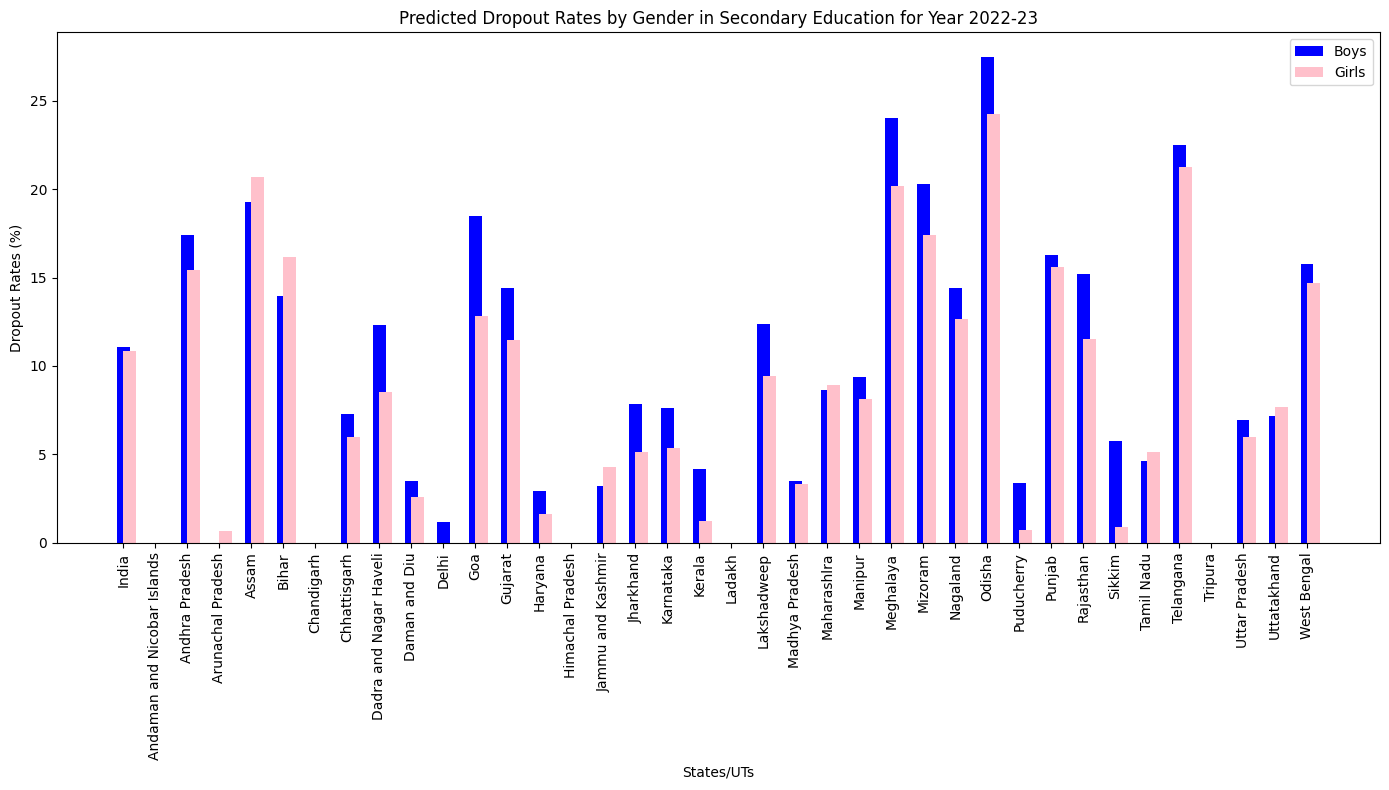

In [19]:
# Clean the data if necessary (e.g., handle missing values)
data = data.dropna(subset=['Secondary Boys Dropout 2022-23', 'Secondary Girls Dropout 2022-23'])

# Plotting
plt.figure(figsize=(14, 8))
x = range(len(data))
plt.bar(x, data['Secondary Boys Dropout 2022-23'], width=0.4, label='Boys', color='blue', align='center')
plt.bar(x, data['Secondary Girls Dropout 2022-23'], width=0.4, label='Girls', color='pink', align='edge')

plt.xlabel('States/UTs')
plt.ylabel('Dropout Rates (%)')
plt.title('Predicted Dropout Rates by Gender in Secondary Education for Year 2022-23')
plt.xticks(x, data['State/UT'], rotation=90)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

In [20]:
from sklearn.metrics import r2_score

# Actual observations from the dataset
actual_dropout_boys_india = india_data[['Primary Boys_2018_19', 'Primary Boys_2019_20', 'Primary Boys_2020_21', 'Primary Boys_2021_22']].values.flatten()
actual_dropout_girls_india = india_data[['Primary Girls_2018_19', 'Primary Girls_2019_20', 'Primary Girls_2020_21', 'Primary Girls_2021_22']].values.flatten()

# Predictions from the model using historical data
predictions_boys_india = model_boys_india.predict(years)
predictions_girls_india = model_girls_india.predict(years)

# Calculate R² scores
r2_score_boys_india = r2_score(actual_dropout_boys_india, predictions_boys_india)
r2_score_girls_india = r2_score(actual_dropout_girls_india, predictions_girls_india)

print("R² Score for Primary Boys across India:", r2_score_boys_india)
print("R² Score for Primary Girls across India:", r2_score_girls_india)


NameError: name 'india_data' is not defined